# MNIST - Categorical Classification
> # Overfitting Issue
## Import TensorFlow

In [6]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow 

In [7]:
import tensorflow as tf

tf.__version__

'2.10.0'

* GPU 설정 확인

In [8]:
tf.test.gpu_device_name()

'/device:GPU:0'

* GPU 종류 확인

In [9]:
!nvidia-smi

Tue Jan 17 14:27:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.12       Driver Version: 472.12       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 61%   43C    P8    14W / 310W |   7181MiB /  8192MiB |     17%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# I. MNIST Data_Set Load & Review

> ## 1) Load MNIST Data_Set

In [10]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

* Train_Data Information

In [11]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)

60000
[5 0 4 1 9]


* Test_Data Information

In [12]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)

10000
[7 2 1 0 4]


> ## 2) Visualization

* matplotlib

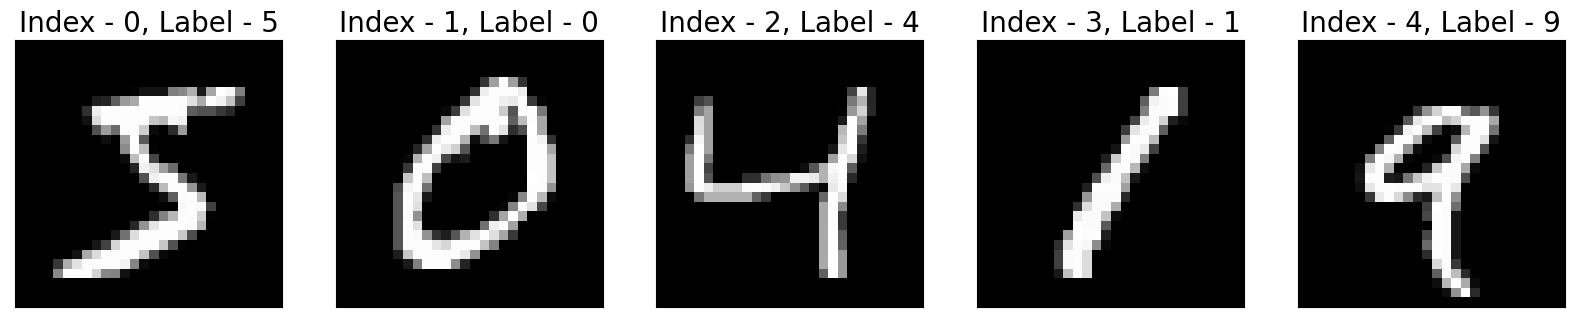

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))
for idx in range(5):
    label = y_train[idx]
    plt.subplot(1, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.title('Index - %d, Label - %d' % (idx, label), fontsize = 20)
plt.show()

* NumPy Array

In [14]:
import numpy as np
np.set_printoptions(linewidth = 150, precision = 2)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# II. Data Preprocessing

> ## 1) Normalization

* 범위: 0 ~ 1

In [15]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [16]:
print(X_train[4])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

> ## 2) Reshape

 * (60000, 28, 28) to (60000, 784)

In [17]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

> ## 3) One Hot Encoding

In [18]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


> ## 4) train_test_split( )

* Train(48,000) vs. Validation(12,000)

In [20]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 784), (48000, 10), (12000, 784), (12000, 10))

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - 복잡한 Model Capacity로 인한 Overfitting

In [44]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [45]:
mnist.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [46]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 4분

In [47]:
# %%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2480 - accuracy: 0.9234 - val_loss: 0.1451 - val_accuracy: 0.9558
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9719 - val_loss: 0.1054 - val_accuracy: 0.9675
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9823 - val_loss: 0.0984 - val_accuracy: 0.9720
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0875 - val_accuracy: 0.9779
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.1201 - val_accuracy: 0.9703
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.1127 - val_accuracy: 0.9753
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.1270 - val_accuracy: 0.9730

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

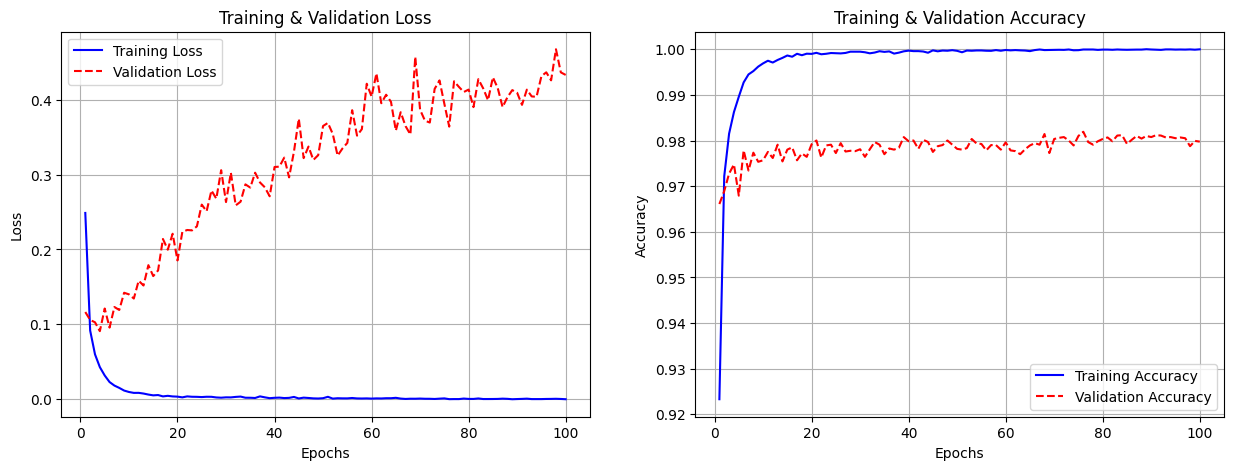

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [21]:
loss, accuracy = mnist.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.32174
Accuracy = 0.98200


> ## 6) Model Predict

* Probability

In [22]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1,:], verbose = 0))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


* Class

In [23]:
print(np.argmax(mnist.predict(X_test[:1,:], verbose = 0)))

7


> ## 7) Image Visualization

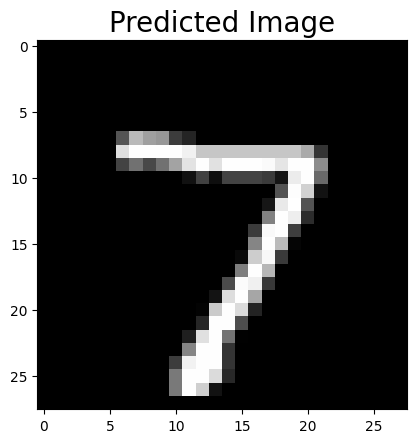

In [24]:
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()

> ## 8) Confusion Matrix

In [25]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
np.argmax(y_test, axis = 1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
mnist.predict(X_test, verbose = 0)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

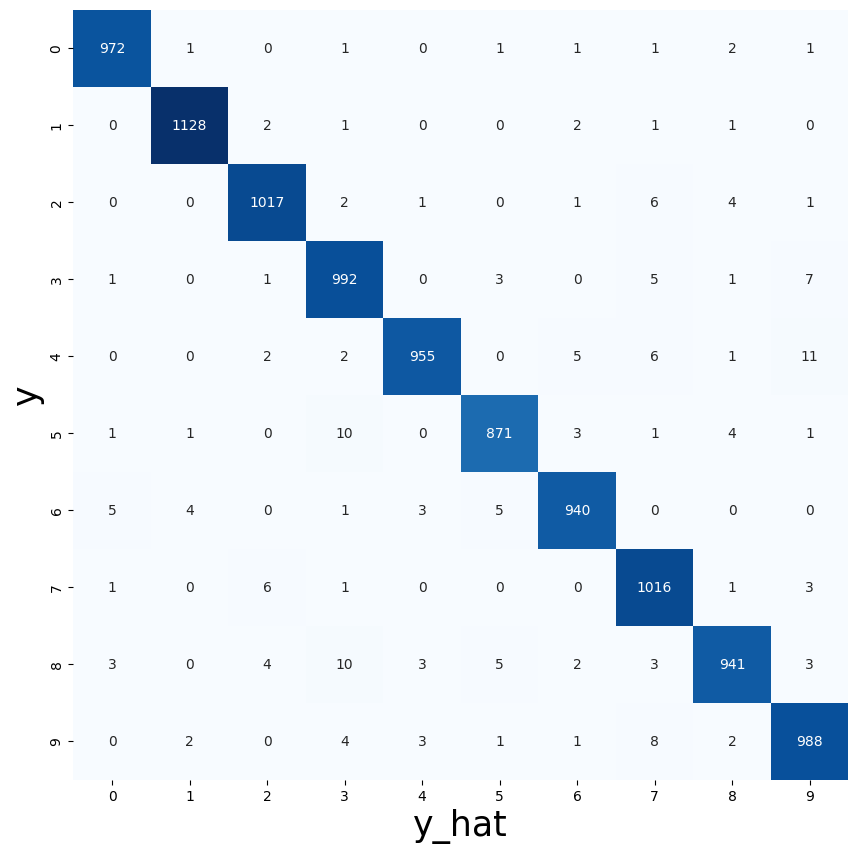

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

CM = confusion_matrix(np.argmax(y_test, axis = 1), # y true
                      np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)) # y pred

plt.figure(figsize = (10, 10))
sns.heatmap(CM,
            annot = True,
            fmt = 'd',
            cmap = 'Blues', 
            cbar = False)
plt.xlabel('y_hat', fontsize = 25)
plt.ylabel('y', fontsize = 25)
plt.show()

> ## 9) Classification Report

In [38]:
from sklearn.metrics import classification_report

print('\n', 
      classification_report(np.argmax(y_test, axis = 1), 
                            np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)))


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# 1)  model capacity 줄이기

In [41]:
mnist1 = models.Sequential()
mnist1.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
mnist1.add(layers.Dense(10, activation = 'softmax'))

In [43]:
mnist1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [48]:
mnist1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [49]:
# %%time

Hist_mnist1 = mnist1.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3198 - accuracy: 0.9099 - val_loss: 0.1973 - val_accuracy: 0.9417
Epoch 2/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1413 - accuracy: 0.9589 - val_loss: 0.1322 - val_accuracy: 0.9625
Epoch 3/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0953 - accuracy: 0.9726 - val_loss: 0.1099 - val_accuracy: 0.9673
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0713 - accuracy: 0.9790 - val_loss: 0.0996 - val_accuracy: 0.9698
Epoch 5/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0555 - accuracy: 0.9834 - val_loss: 0.0943 - val_accuracy: 0.9719
Epoch 6/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0872 - val_accuracy: 0.9747
Epoch 7/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0354 - accuracy: 0.9899 - val_loss: 0.0892 - val_accuracy: 0.9737

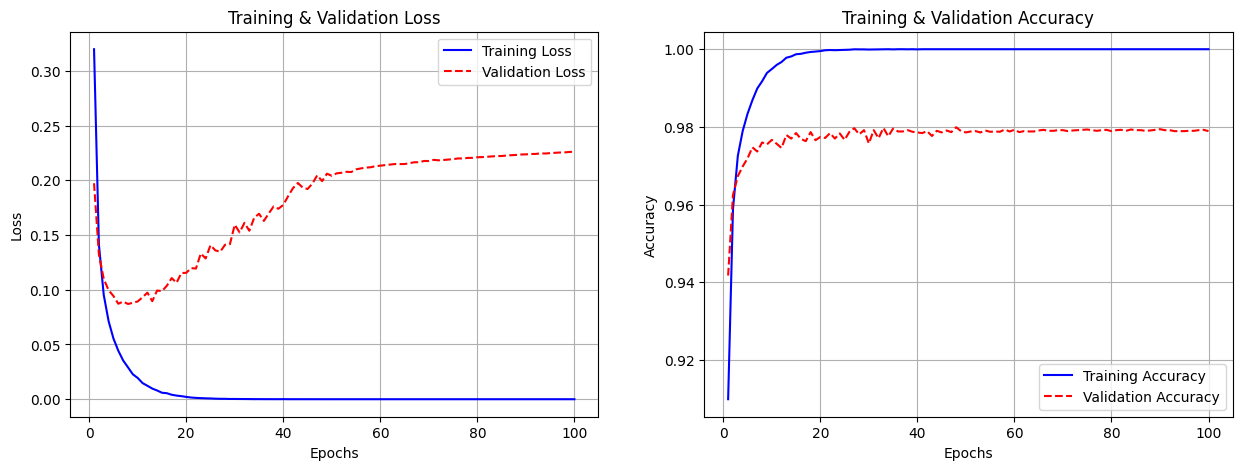

In [50]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist1.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist1.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist1.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist1.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist1.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization
- https://wooono.tistory.com/221
- L1 Regularization 의 개념에서 가장 중요한 것은 cost function 에 가중치의 절대값을 더해준다는 것
- 기존의 cost function 에 가중치의 제곱을 더함으로써 가중치가 너무 크지 않은 방향으로 학습되게 됩니다.
L1 Loss, L2 Loss 의 차이
L2 Loss 는 직관적으로 오차의 제곱을 더하기 때문에 Outlier 에 더 큰 영향을 받습니다.
"L1 Loss 가 L2 Loss 에 비해 Outlier 에 대하여 더 Robust(덜 민감 혹은 둔감) 하다." 라고 표현 할 수 있습니다.
Outlier 가 적당히 무시되길 원한다면 L1 Loss 를 사용하고
Outlier 의 등장에 신경써야 하는 경우라면 L2 Loss 를 사용하는 것이 좋겠습니다.
L1 Loss 는 0인 지점에서 미분이 불가능하다는 단점 또한 가지고 있습니다.

L1 Regularization, L2 Regularization 의 차이와 선택 기준
L1 Regularization은 가중치 업데이트 시, 가중치의 크기에 상관 없이 상수값을 빼면서 진행됩니다.

때문에 작은 가중치들은 거의 0으로 수렴 되어, 몇개의 중요한 가중치들만 남게 됩니다.

그러므로 몇 개의 의미 있는 값을 끄집어내고 싶은 sparse model 같은 경우에는 L1 Regularization이 효과적입니다.

다만, L1 Regularization은 아래 그림처럼 미분 불가능한 점이 있기 때문에 Gradient-base learning 에는 주의가 필요합니다.


L2 Regularization은 가중치 업데이트 시, 가중치의 크기가 직접적인 영향을 미칩니다.

따라서, L2는 L1 보다 가중치 규제에 좀 더 효과적입니다.

In [2]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R = models.Sequential()
mnist_L2R.add(layers.Dense(512, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001), # l2 기본값 0.01
                       input_shape = (28 * 28,)))
mnist_L2R.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R.add(layers.Dense(10, activation = 'softmax'))

In [3]:
mnist_L2R.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [4]:
mnist_L2R.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [21]:
# %%time

mnist_L2R_H = mnist_L2R.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 2s 2ms/step - loss: 0.2578 - accuracy: 0.9240 - val_loss: 0.1423 - val_accuracy: 0.9613
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1020 - accuracy: 0.9714 - val_loss: 0.1229 - val_accuracy: 0.9673
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9801 - val_loss: 0.1007 - val_accuracy: 0.9747
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0543 - accuracy: 0.9865 - val_loss: 0.0910 - val_accuracy: 0.9770
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0446 - accuracy: 0.9893 - val_loss: 0.1085 - val_accuracy: 0.9746
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0380 - accuracy: 0.9913 - val_loss: 0.1016 - val_accuracy: 0.9778
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0332 - accuracy: 0.9931 - val_loss: 0.1077 - val_accuracy: 0.9789

==== L2 Regularization ====


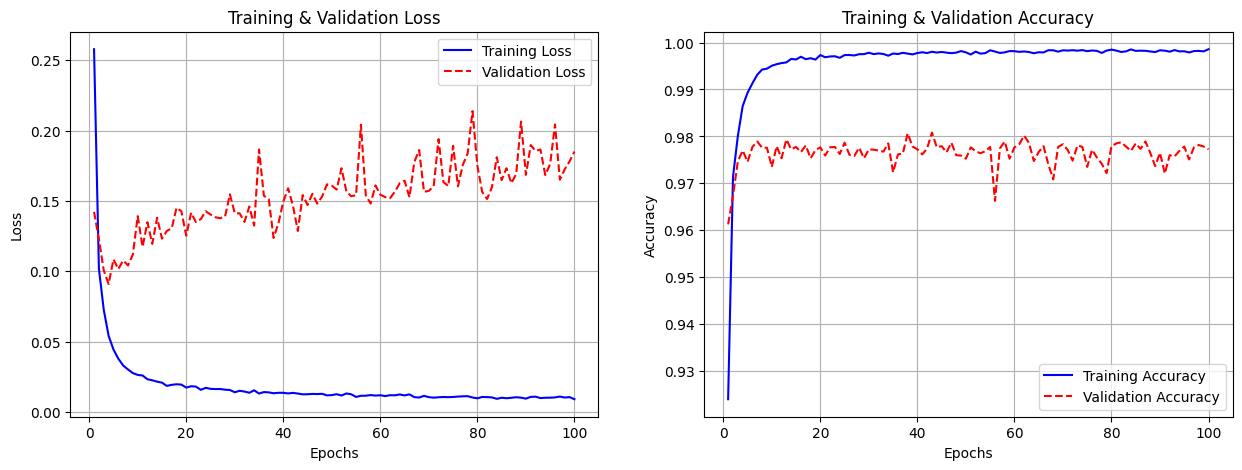

In [22]:
import matplotlib.pyplot as plt
print('==== L2 Regularization ====')

epochs = range(1, len(mnist_L2R_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_L2R_H.history['loss'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_L2R_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Drop out

In [30]:

mnist_D = models.Sequential()
mnist_D.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist_D.add(layers.Dropout(0.4))
mnist_D.add(layers.Dense(256, activation = 'relu'))
mnist_D.add(layers.Dropout(0.2))
mnist_D.add(layers.Dense(10, activation = 'softmax'))

In [31]:
mnist_D.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [32]:
mnist_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [33]:
# %%time
mnist_D_H = mnist_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3245 - accuracy: 0.9009 - val_loss: 0.1463 - val_accuracy: 0.9566
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1455 - accuracy: 0.9568 - val_loss: 0.1070 - val_accuracy: 0.9693
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1100 - accuracy: 0.9658 - val_loss: 0.1041 - val_accuracy: 0.9715
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9722 - val_loss: 0.1023 - val_accuracy: 0.9728
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.0913 - val_accuracy: 0.9767
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9786 - val_loss: 0.0925 - val_accuracy: 0.9760
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0612 - accuracy: 0.9811 - val_loss: 0.0899 - val_accuracy: 0.9770

==== Drop Out ====


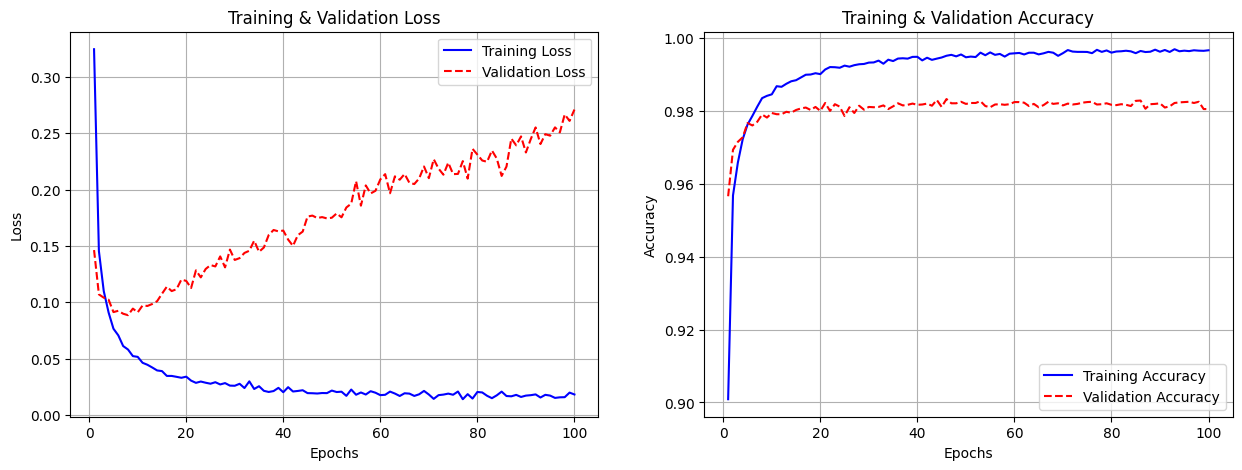

In [34]:
import matplotlib.pyplot as plt
print('==== Drop Out ====')

epochs = range(1, len(mnist_D_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_D_H.history['loss'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_D_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Batch Normalization

In [37]:
mnist_BN = models.Sequential()
mnist_BN.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist_BN.add(layers.BatchNormalization())
mnist_BN.add(layers.Activation('relu'))
mnist_BN.add(layers.Dense(256 ))
mnist_BN.add(layers.BatchNormalization())
mnist_BN.add(layers.Activation('relu'))
mnist_BN.add(layers.Dense(10, activation = 'softmax'))

In [38]:
mnist_BN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 256)              

In [39]:
mnist_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [40]:
# %%time

mnist_BN_H = mnist_BN.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1777 - accuracy: 0.9467 - val_loss: 0.1257 - val_accuracy: 0.9615
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9778 - val_loss: 0.1000 - val_accuracy: 0.9703
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.9855 - val_loss: 0.1047 - val_accuracy: 0.9722
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0875 - val_accuracy: 0.9765
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0988 - val_accuracy: 0.9749
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.0877 - val_accuracy: 0.9781
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.1027 - val_accuracy: 0.9770

==== Batch Normalization ====


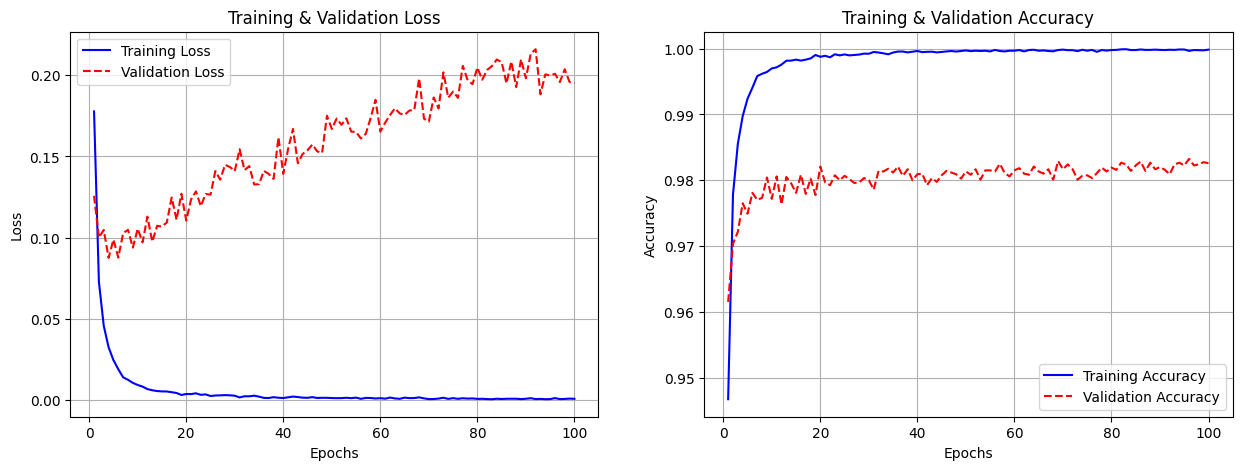

In [42]:
import matplotlib.pyplot as plt
print('==== Batch Normalization ====')

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_BN_H.history['loss'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_BN_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# loss 결과 비교

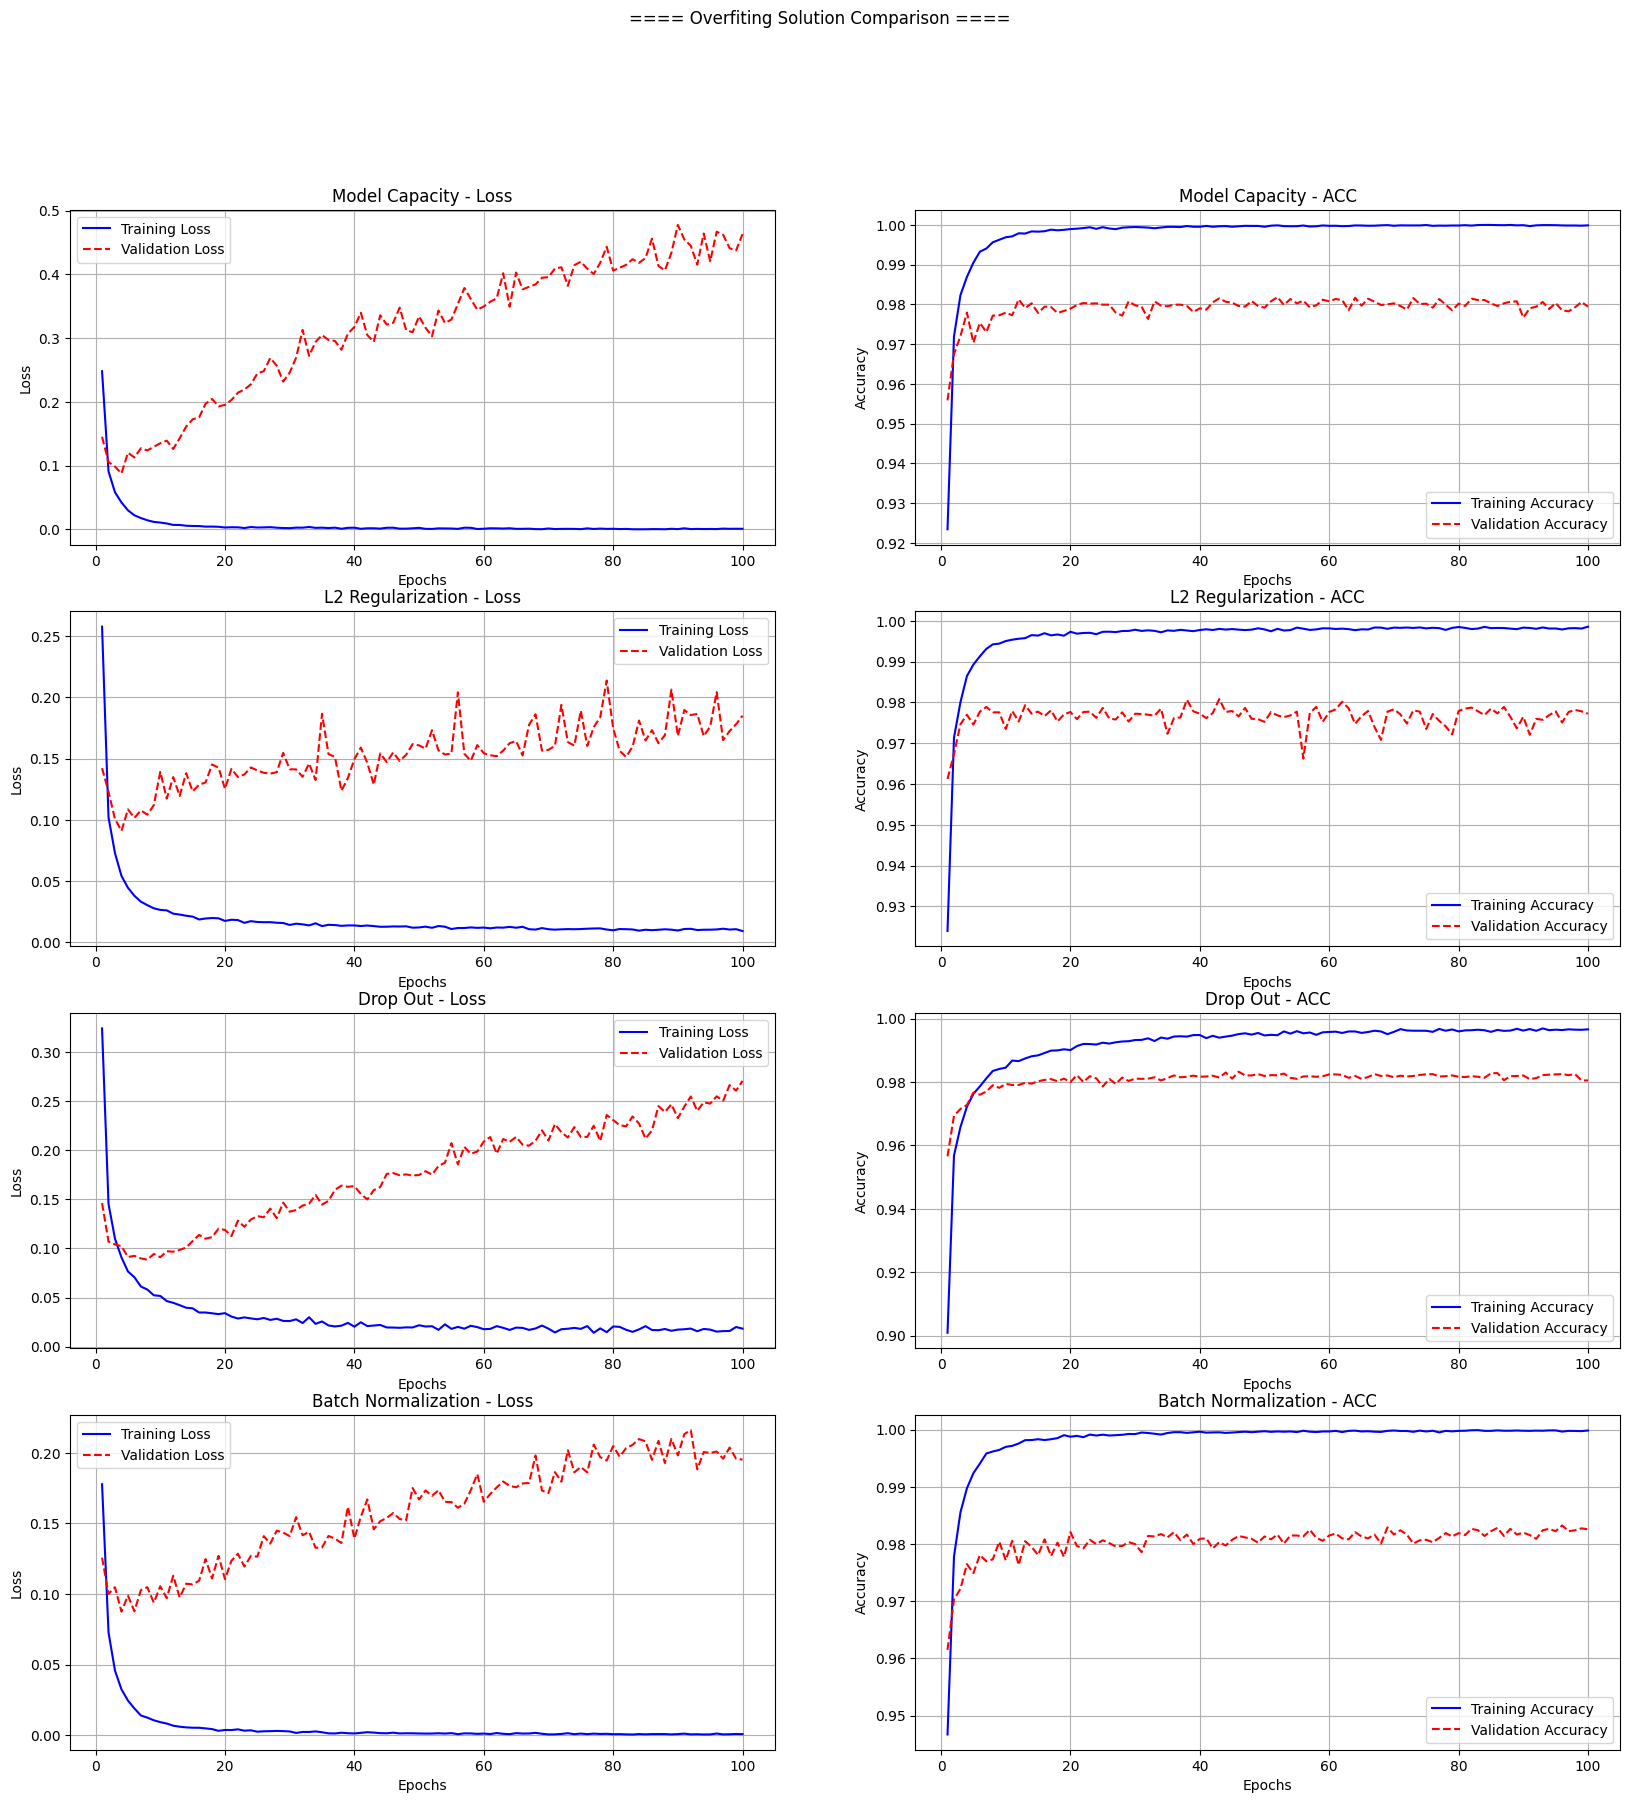

In [55]:
import matplotlib.pyplot as plt

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Comparison ====')


plt.subplot(4, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Model Capacity - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Model Capacity - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()


plt.subplot(4, 2, 3)
plt.plot(epochs, mnist_L2R_H.history['loss'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_loss'], 'r--')
plt.title('L2 Regularization - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(epochs, mnist_L2R_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_accuracy'], 'r--')
plt.title('L2 Regularization - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()


plt.subplot(4, 2, 5)
plt.plot(epochs, mnist_D_H.history['loss'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_loss'], 'r--')
plt.title('Drop Out - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(epochs, mnist_D_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_accuracy'], 'r--')
plt.title('Drop Out - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()



plt.subplot(4, 2, 7)
plt.plot(epochs, mnist_BN_H.history['loss'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_loss'], 'r--')
plt.title('Batch Normalization - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 8)
plt.plot(epochs, mnist_BN_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_accuracy'], 'r--')
plt.title('Batch Normalization - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Batch Normalization & Drop out

In [64]:
mnist_BN_D = models.Sequential()

mnist_BN_D.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist_BN_D.add(layers.BatchNormalization())
mnist_BN_D.add(layers.Activation('relu'))
mnist_BN_D.add(layers.Dropout(0.4))

mnist_BN_D.add(layers.Dense(256 ))
mnist_BN_D.add(layers.BatchNormalization())
mnist_BN_D.add(layers.Activation('relu'))
mnist_BN_D.add(layers.Dropout(0.4))
mnist_BN_D.add(layers.Dense(10, activation = 'softmax'))

In [65]:
mnist_BN_D.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [66]:
mnist_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [67]:
# %%time

mnist_BN_D_H = mnist_BN_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3167 - accuracy: 0.9041 - val_loss: 0.1448 - val_accuracy: 0.9559
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1585 - accuracy: 0.9514 - val_loss: 0.1210 - val_accuracy: 0.9657
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1278 - accuracy: 0.9614 - val_loss: 0.1045 - val_accuracy: 0.9723
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1075 - accuracy: 0.9672 - val_loss: 0.1067 - val_accuracy: 0.9718
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1003 - accuracy: 0.9691 - val_loss: 0.0983 - val_accuracy: 0.9746
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.9728 - val_loss: 0.0978 - val_accuracy: 0.9758
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9752 - val_loss: 0.0903 - val_accuracy: 0.9777

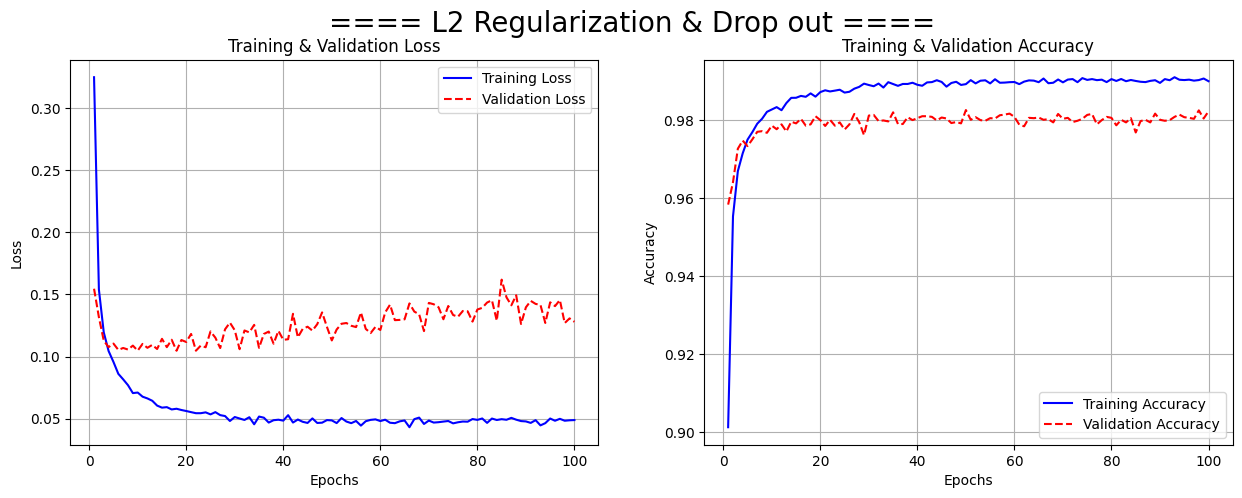

In [70]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_model.history['loss']) + 1)
history_model = mnist_L2R_D_H
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Drop out

In [56]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_D = models.Sequential()
mnist_L2R_D.add(layers.Dense(512, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_D.add(layers.Dropout(0.4))
mnist_L2R_D.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_D.add(layers.Dropout(0.2))
mnist_L2R_D.add(layers.Dense(10, activation = 'softmax'))

In [57]:
mnist_L2R_D.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [58]:
mnist_L2R_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [59]:
# %%time

mnist_L2R_D_H = mnist_L2R_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.9013 - val_loss: 0.1546 - val_accuracy: 0.9583
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1539 - accuracy: 0.9553 - val_loss: 0.1316 - val_accuracy: 0.9641
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1195 - accuracy: 0.9669 - val_loss: 0.1128 - val_accuracy: 0.9727
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9715 - val_loss: 0.1076 - val_accuracy: 0.9747
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0956 - accuracy: 0.9750 - val_loss: 0.1104 - val_accuracy: 0.9733
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9769 - val_loss: 0.1053 - val_accuracy: 0.9751
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9791 - val_loss: 0.1069 - val_accuracy: 0.9770

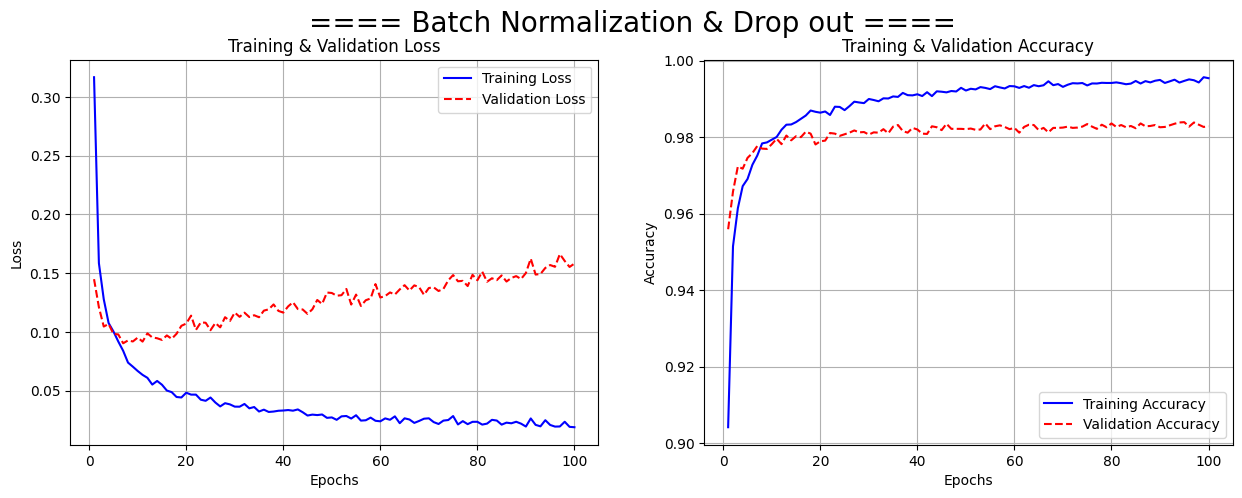

In [69]:
import matplotlib.pyplot as plt


epochs = range(1, len(history_model.history['loss']) + 1)
history_model = mnist_BN_D_H
plt.figure(figsize = (15, 5))
plt.suptitle('==== Batch Normalization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Batch Normalization

In [71]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_BN = models.Sequential()
mnist_L2R_BN.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_BN.add(layers.BatchNormalization())
mnist_L2R_BN.add(layers.Activation('relu'))


mnist_L2R_BN.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_BN.add(layers.BatchNormalization())
mnist_L2R_BN.add(layers.Activation('relu'))

mnist_L2R_BN.add(layers.Dense(10, activation = 'softmax'))

In [72]:
mnist_L2R_BN.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 256)             

In [73]:
mnist_L2R_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [74]:
# %%time

mnist_L2R_BN_H = mnist_L2R_BN.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1878 - accuracy: 0.9464 - val_loss: 0.1264 - val_accuracy: 0.9632
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.9773 - val_loss: 0.1017 - val_accuracy: 0.9730
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0565 - accuracy: 0.9851 - val_loss: 0.0881 - val_accuracy: 0.9779
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0444 - accuracy: 0.9892 - val_loss: 0.0958 - val_accuracy: 0.9759
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0354 - accuracy: 0.9920 - val_loss: 0.1067 - val_accuracy: 0.9754
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0320 - accuracy: 0.9931 - val_loss: 0.0990 - val_accuracy: 0.9763
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0285 - accuracy: 0.9941 - val_loss: 0.1007 - val_accuracy: 0.9788

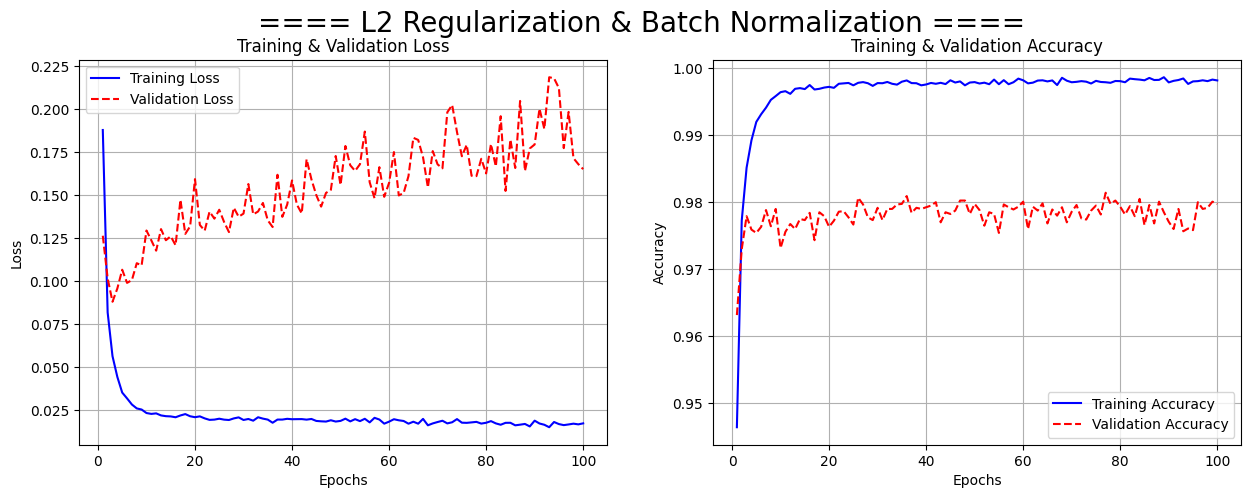

In [75]:
import matplotlib.pyplot as plt


epochs = range(1, len(history_model.history['loss']) + 1)
history_model = mnist_L2R_BN_H
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Batch Normalization & Drop out

In [76]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_BN_D = models.Sequential()
mnist_L2R_BN_D.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_BN_D.add(layers.BatchNormalization())
mnist_L2R_BN_D.add(layers.Activation('relu'))
mnist_L2R_BN_D.add(layers.Dropout(0.4))

mnist_L2R_BN_D.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_BN_D.add(layers.BatchNormalization())
mnist_L2R_BN_D.add(layers.Activation('relu'))
mnist_L2R_BN_D.add(layers.Dropout(0.2))

mnist_L2R_BN_D.add(layers.Dense(10, activation = 'softmax'))

In [77]:
mnist_L2R_BN_D.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                     

In [78]:
mnist_L2R_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [79]:
# %%time

mnist_L2R_BN_D_H = mnist_L2R_BN_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.9158 - val_loss: 0.1453 - val_accuracy: 0.9597
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1517 - accuracy: 0.9559 - val_loss: 0.1205 - val_accuracy: 0.9680
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1250 - accuracy: 0.9637 - val_loss: 0.1106 - val_accuracy: 0.9720
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9715 - val_loss: 0.1062 - val_accuracy: 0.9723
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9749 - val_loss: 0.0965 - val_accuracy: 0.9770
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9774 - val_loss: 0.1072 - val_accuracy: 0.9744
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9791 - val_loss: 0.1003 - val_accuracy: 0.9773

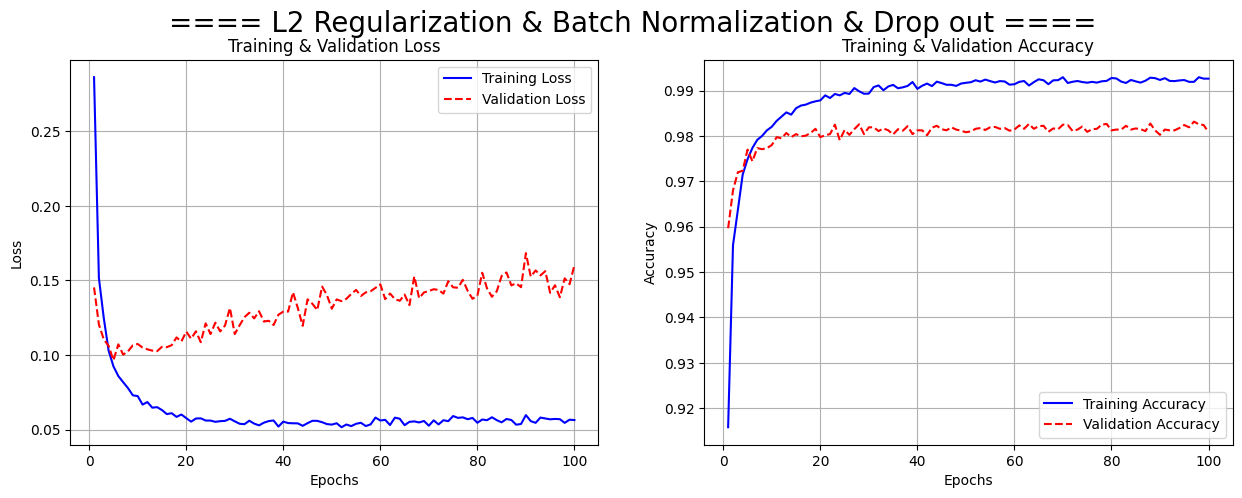

In [80]:
import matplotlib.pyplot as plt


epochs = range(1, len(history_model.history['loss']) + 1)
history_model = mnist_L2R_BN_D_H
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# 조합 loss 결과 비교

In [85]:
model_h_list = ['mnist_L2R_BN_H', 'mnist_L2R_D_H', 'mnist_BN_D_H', 'mnist_L2R_BN_D_H']
model_h_vlist = [mnist_L2R_BN_H, mnist_L2R_D_H, mnist_BN_D_H, mnist_L2R_BN_D_H]

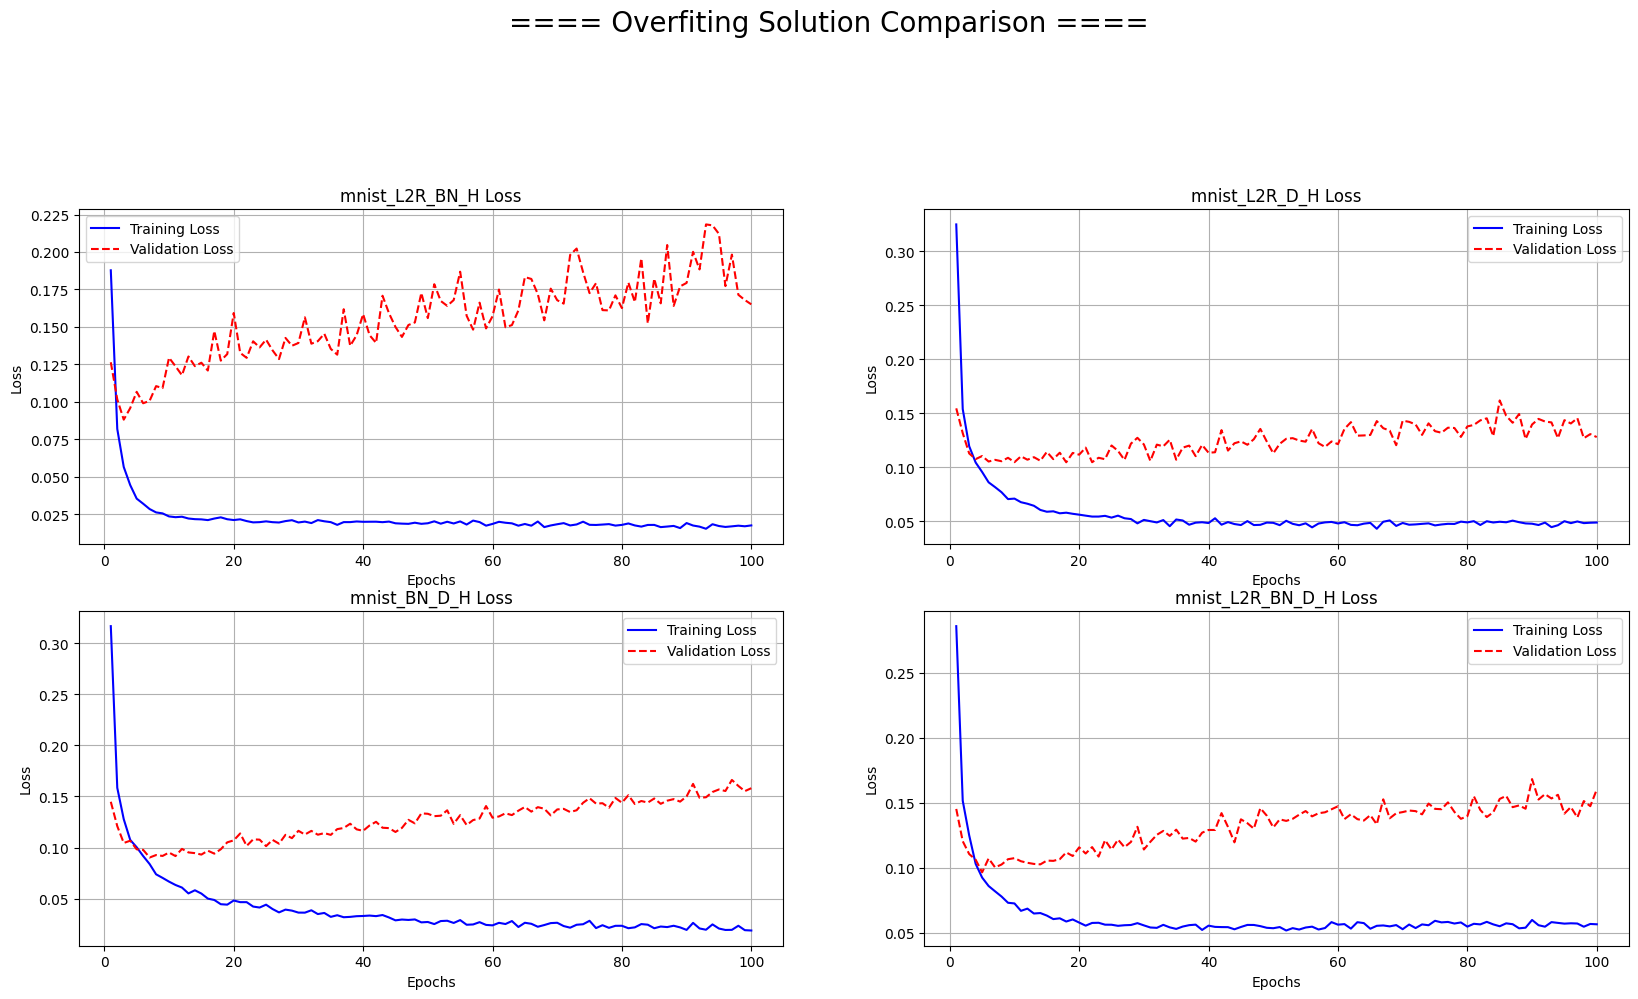

In [87]:
import matplotlib.pyplot as plt

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Comparison ====', fontsize=20)


for i in range(len(model_h_list)):
    plt.subplot(len(model_h_list), int(len(model_h_list)/2), i+1)
    plt.plot(epochs, model_h_vlist[i].history['loss'], 'b-')
    plt.plot(epochs, model_h_vlist[i].history['val_loss'], 'r--')
    plt.title(f'{model_h_list[i]} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.grid()

plt.show()

# The End